In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('avocado.csv', index_col='Date')
df

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,,
2015-12-27,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
2018-01-28,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
2018-01-21,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico


In [3]:
x= df['AveragePrice']
y =df['Total Volume']

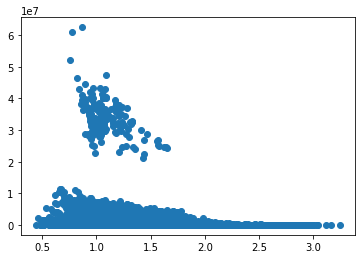

In [4]:
plt.scatter(x,y)

In [5]:
x =df['AveragePrice'].to_numpy()
x = x.reshape(-1,1)
x

array([[1.33],
       [1.35],
       [0.93],
       ...,
       [1.87],
       [1.93],
       [1.62]])

In [6]:
y =df['Total Volume'].to_numpy()
y = y.reshape(-1,1)
y

array([[ 64236.62],
       [ 54876.98],
       [118220.22],
       ...,
       [ 13766.76],
       [ 16205.22],
       [ 17489.58]])

In [19]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split 

In [20]:
model = linear_model.LinearRegression()

In [21]:
model.fit(x,y)

LinearRegression()

In [22]:
model.intercept_

array([3174917.54143962])

In [23]:
model.coef_

array([[-1653136.00285028]])

In [24]:
print('y =' +str(model.intercept_) + '+' +str(model.coef_) + 'x')


y =[3174917.54143962]+[[-1653136.00285028]]x


In [25]:
predict = model.predict(x[0:])
predict

array([[ 976246.65764875],
       [ 943183.93759174],
       [1637501.05878886],
       ...,
       [  83553.2161096 ],
       [ -15634.94406142],
       [ 496837.21682217]])

截距: [3174917.54143962]
斜率: [[-1653136.00285028]]
y =[3174917.54143962]+[[-1653136.00285028]]x
3.715348275307173


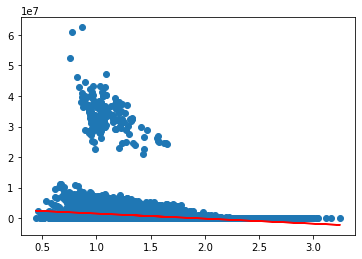

In [26]:
plt.plot(x,predict,color='red')
plt.scatter(x,y)
a = model.intercept_
b = model.coef_

print('截距:', a)
print('斜率:', b)
print('y =' + str(a) + '+' + str(b) + 'x')
print((model.score(x,y)*100))

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [28]:
model.fit(x_train, y_train)

LinearRegression()

In [29]:
a_train =model.intercept_
a_train

array([3188016.26156387])

In [30]:
b_train =model.coef_
b_train

array([[-1657868.133661]])

In [31]:
print('y =' + str(a_train)+  '+' +str(b_train)+ 'x')

y =[3188016.26156387]+[[-1657868.133661]]x


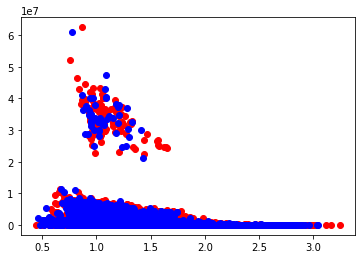

In [32]:
plt.scatter(x_train, y_train, color='red')
plt.scatter(x_test, y_test, color='blue')

截距: [3188016.26156387]
斜率: [[-1657868.133661]]
y =[3188016.26156387]+[[-1657868.133661]]x
模型分數: 3.7039672812886892


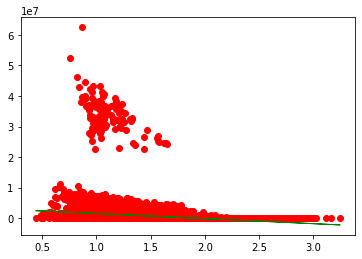

In [33]:
plt.plot(x_train,model.predict(x_train),color='green', linewidth=1)
plt.scatter(x_train,y_train, color='red')
a = model.intercept_
b = model.coef_

print('截距:', a)
print('斜率:', b)
print('y =' + str(a) + '+' + str(b) + 'x')
print('模型分數:',(model.score(x_train,y_train)*100))

截距: [3188016.26156387]
斜率: [[-1657868.133661]]
y =[3188016.26156387]+[[-1657868.133661]]x
模型分數: 3.7412345669502467


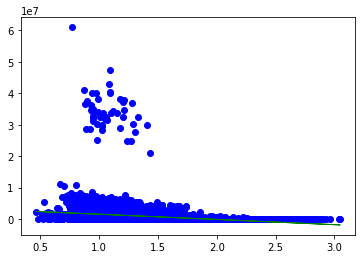

In [34]:
plt.plot(x_test,model.predict(x_test),color='green', linewidth=1)
plt.scatter(x_test,y_test, color='blue')
a = model.intercept_
b = model.coef_

print('截距:', a)
print('斜率:', b)
print('y =' + str(a) + '+' + str(b) + 'x')
print('模型分數:',(model.score(x_test,y_test)*100))